# House Prices Notebook

In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

2023-07-15 11:01:11.266175: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 11:01:11.852057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 11:01:11.854315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 11:01:13.226686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.13.0
TensorFlow Decision Forests v1.5.0


In [59]:
train_file_path = 'train.csv'
dataset_df = pd.read_csv(train_file_path)
print('Full train dataset shape is {}'.format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [61]:
dataset_df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [5]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
dataset_df.drop('Id', axis=1, inplace=True)

In [7]:
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
dataset_df.drop(['Alley','PoolQC','Fence','MiscFeature','MasVnrType','FireplaceQu'], axis=1, inplace=True)

In [23]:
dataset_df.fillna(method='ffill', inplace=True)

In [24]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5, 0, 'Preço de venda')

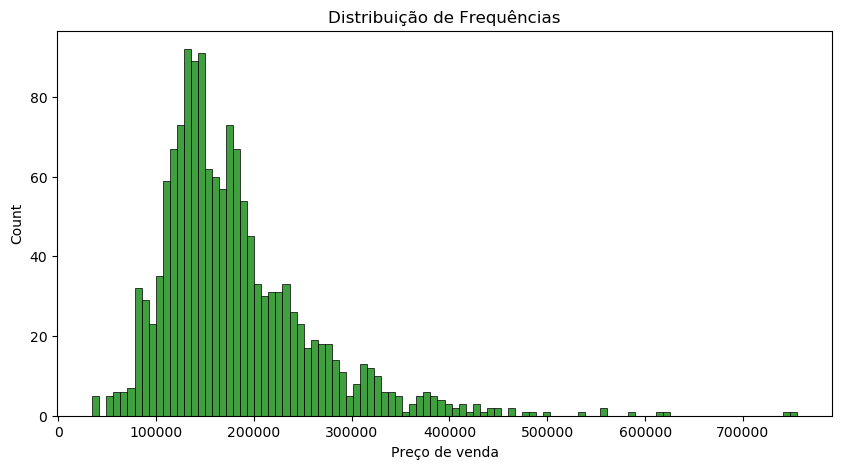

In [25]:
print(dataset_df.SalePrice.describe())
plt.figure(figsize=(10,5))
ax = sns.histplot(dataset_df['SalePrice'], bins=100, color='g')
ax.set_title('Distribuição de Frequências')
ax.set_xlabel('Preço de venda')

In [13]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [26]:
df_num = dataset_df.select_dtypes(include=['int64','float64'])

In [27]:
df_num.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [28]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset_df)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print('{} examples in training, {} examples in test'.format(len(train_ds_pd), len(test_ds_pd)))

1015 examples in training, 445 examples in test


## Train the Random Forest model

### Convert Pandas dataframe to TensorFlow dataframe

In [29]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

In [30]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [31]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template = 'benchmark_rank1', task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=['mse'])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpr8jehhl9 as temporary training directory


In [32]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [33]:
train_ds_pd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,136000
1451,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,New,Partial,287090
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,145000
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000


In [34]:
rf.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:02.919026. Found 1015 examples.
Training model...


[INFO 23-07-15 11:20:29.8551 -03 kernel.cc:1243] Loading model from path /tmp/tmpr8jehhl9/model/ with prefix ee02e4d360f0420b
[INFO 23-07-15 11:20:30.0456 -03 decision_forest.cc:660] Model loaded with 300 root(s), 96496 node(s), and 70 input feature(s).
[INFO 23-07-15 11:20:30.0457 -03 abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-07-15 11:20:30.0457 -03 kernel.cc:1075] Use fast generic engine


Model trained in 0:00:01.180233
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [58]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

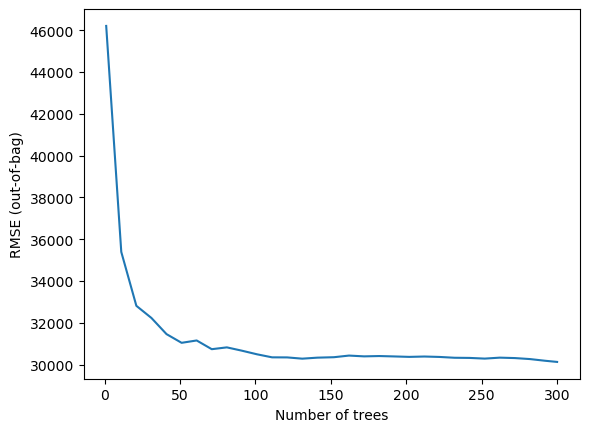

In [35]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],
        [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')
plt.show()

In [36]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1015, accuracy=None, loss=None, rmse=30127.36596686016, ndcg=None, aucs=None, auuc=None, qini=None)

In [37]:
evaluation = rf.evaluate(x=test_ds, return_dict=True)

for name, value in evaluation.items():
    print(f'{name}: {value:.4f}')

1/1 [==============================] - 0s 345ms/step - loss: 0.0000e+00 - mse: 833660480.0000
loss: 0.0000
mse: 833660480.0000


In [38]:
print("Available variable importances:")
for importance in inspector.variable_importances().keys():
    print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [39]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #57), 97.0),
 ("GarageCars" (1; #29), 37.0),
 ("GrLivArea" (1; #35), 22.0),
 ("ExterQual" (4; #21), 18.0),
 ("1stFlrSF" (1; #0), 14.0),
 ("GarageArea" (1; #28), 13.0),
 ("3SsnPorch" (1; #2), 11.0),
 ("BsmtQual" (4; #13), 11.0),
 ("BsmtHalfBath" (1; #12), 10.0),
 ("EnclosedPorch" (1; #19), 8.0),
 ("BsmtFinSF1" (1; #7), 6.0),
 ("BsmtFinSF2" (1; #8), 6.0),
 ("TotalBsmtSF" (1; #67), 6.0),
 ("GarageYrBlt" (1; #34), 5.0),
 ("LowQualFinSF" (1; #48), 5.0),
 ("MiscVal" (1; #52), 5.0),
 ("Fireplaces" (1; #24), 4.0),
 ("FullBath" (1; #26), 4.0),
 ("2ndFlrSF" (1; #1), 3.0),
 ("BsmtFullBath" (1; #11), 3.0),
 ("KitchenQual" (4; #41), 3.0),
 ("LotArea" (1; #44), 2.0),
 ("LotFrontage" (1; #46), 2.0),
 ("YearBuilt" (1; #70), 2.0),
 ("BedroomAbvGr" (1; #3), 1.0),
 ("OpenPorchSF" (1; #55), 1.0),
 ("OverallCond" (1; #56), 1.0)]

In [40]:
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

In [41]:
variable_importances

[("OverallQual" (1; #57), 97.0),
 ("GarageCars" (1; #29), 37.0),
 ("GrLivArea" (1; #35), 22.0),
 ("ExterQual" (4; #21), 18.0),
 ("1stFlrSF" (1; #0), 14.0),
 ("GarageArea" (1; #28), 13.0),
 ("3SsnPorch" (1; #2), 11.0),
 ("BsmtQual" (4; #13), 11.0),
 ("BsmtHalfBath" (1; #12), 10.0),
 ("EnclosedPorch" (1; #19), 8.0),
 ("BsmtFinSF1" (1; #7), 6.0),
 ("BsmtFinSF2" (1; #8), 6.0),
 ("TotalBsmtSF" (1; #67), 6.0),
 ("GarageYrBlt" (1; #34), 5.0),
 ("LowQualFinSF" (1; #48), 5.0),
 ("MiscVal" (1; #52), 5.0),
 ("Fireplaces" (1; #24), 4.0),
 ("FullBath" (1; #26), 4.0),
 ("2ndFlrSF" (1; #1), 3.0),
 ("BsmtFullBath" (1; #11), 3.0),
 ("KitchenQual" (4; #41), 3.0),
 ("LotArea" (1; #44), 2.0),
 ("LotFrontage" (1; #46), 2.0),
 ("YearBuilt" (1; #70), 2.0),
 ("BedroomAbvGr" (1; #3), 1.0),
 ("OpenPorchSF" (1; #55), 1.0),
 ("OverallCond" (1; #56), 1.0)]

In [143]:
type(variable_importances[0][0])

tensorflow_decision_forests.component.py_tree.dataspec.SimpleColumnSpec

In [42]:
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

In [43]:
feature_ranks = range(len(feature_names))

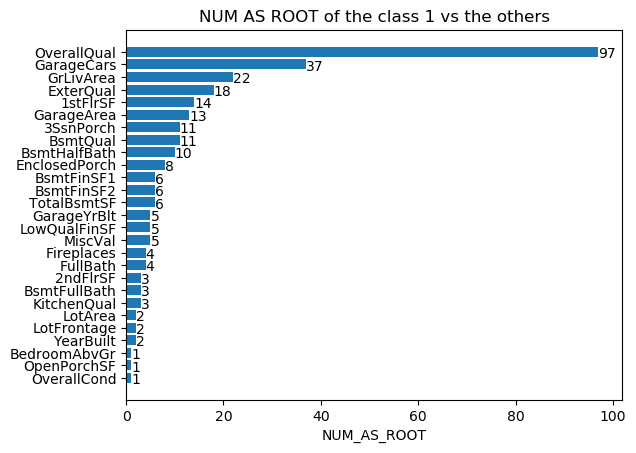

In [44]:
bar = plt.barh(feature_ranks, feature_importances,
               label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()


for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x()+patch.get_width(), patch.get_y(),
            f"{importance:.0f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
#plt.tight_layout()
plt.show()

In [45]:
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, 
                                                task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)

output = pd.DataFrame({'Id': ids,
                      'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 32ms/step


,Id,SalePrice
0,1461,127354.234375
1,1462,153518.671875
2,1463,180439.015625
3,1464,185355.125000
4,1465,189722.640625


In [46]:
output.to_csv('output.csv', index=False)

In [47]:
import dtreeviz

In [48]:
dtreeviz.__version__

'2.2.2'

In [49]:
train_ds_pd.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [50]:
viz_cmodel = dtreeviz.model(rf,
                           tree_index=3,
                           X_train=train_ds_pd[feature_names],
                           y_train=train_ds_pd[label],
                           feature_names=feature_names,
                           target_name=label)

In [57]:
viz_cmodel.view()

TypeError: node_stats() missing 1 required positional argument: 'node_id'